In [1]:
import sys
sys.path.append('..')

import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from sklearn.datasets import make_blobs

plt.style.use('astroLuSt.styles.LuSt_style')


from astroLuSt.visualization import plots as alvp

# Parallel Coordinate Plot

Generate a dummy dataset

In [28]:
nsamples = 100

id = np.random.choice(['A', 'B', 'C', 'D'], size=(nsamples,1))
x1 = np.random.rand(*(nsamples,1))
x2 = np.random.randint(50, 100, (nsamples,1))
x3 = np.random.choice(['relu', 'sigmoid', 'tanh',], size=(nsamples,1))
score = np.random.uniform(0, 100, (nsamples,1))
score[:5] = np.nan
score[5:7] = 0
score[7:10] = -1
X = {
    '#':id.flatten(),
    'x1':x1.flatten(),
    'x2':x2.flatten(),
    'x3':x3.flatten(),
    'score':score.flatten(),
}

df = pl.DataFrame(data=X)

df_np = df.select(pl.col(['x1','x2','score'])).to_numpy()


Let's look at the different features/coordinates

INFO(ParallelCoordinates): Removed
    0 row(s) via (-inf < score < inf),
    0 row(s) containig nans,
    0 row(s) total.

INFO(ParallelCoordinates): Removed
    0 row(s) where score evaluated to inf or -inf due to "score_scaling",



[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


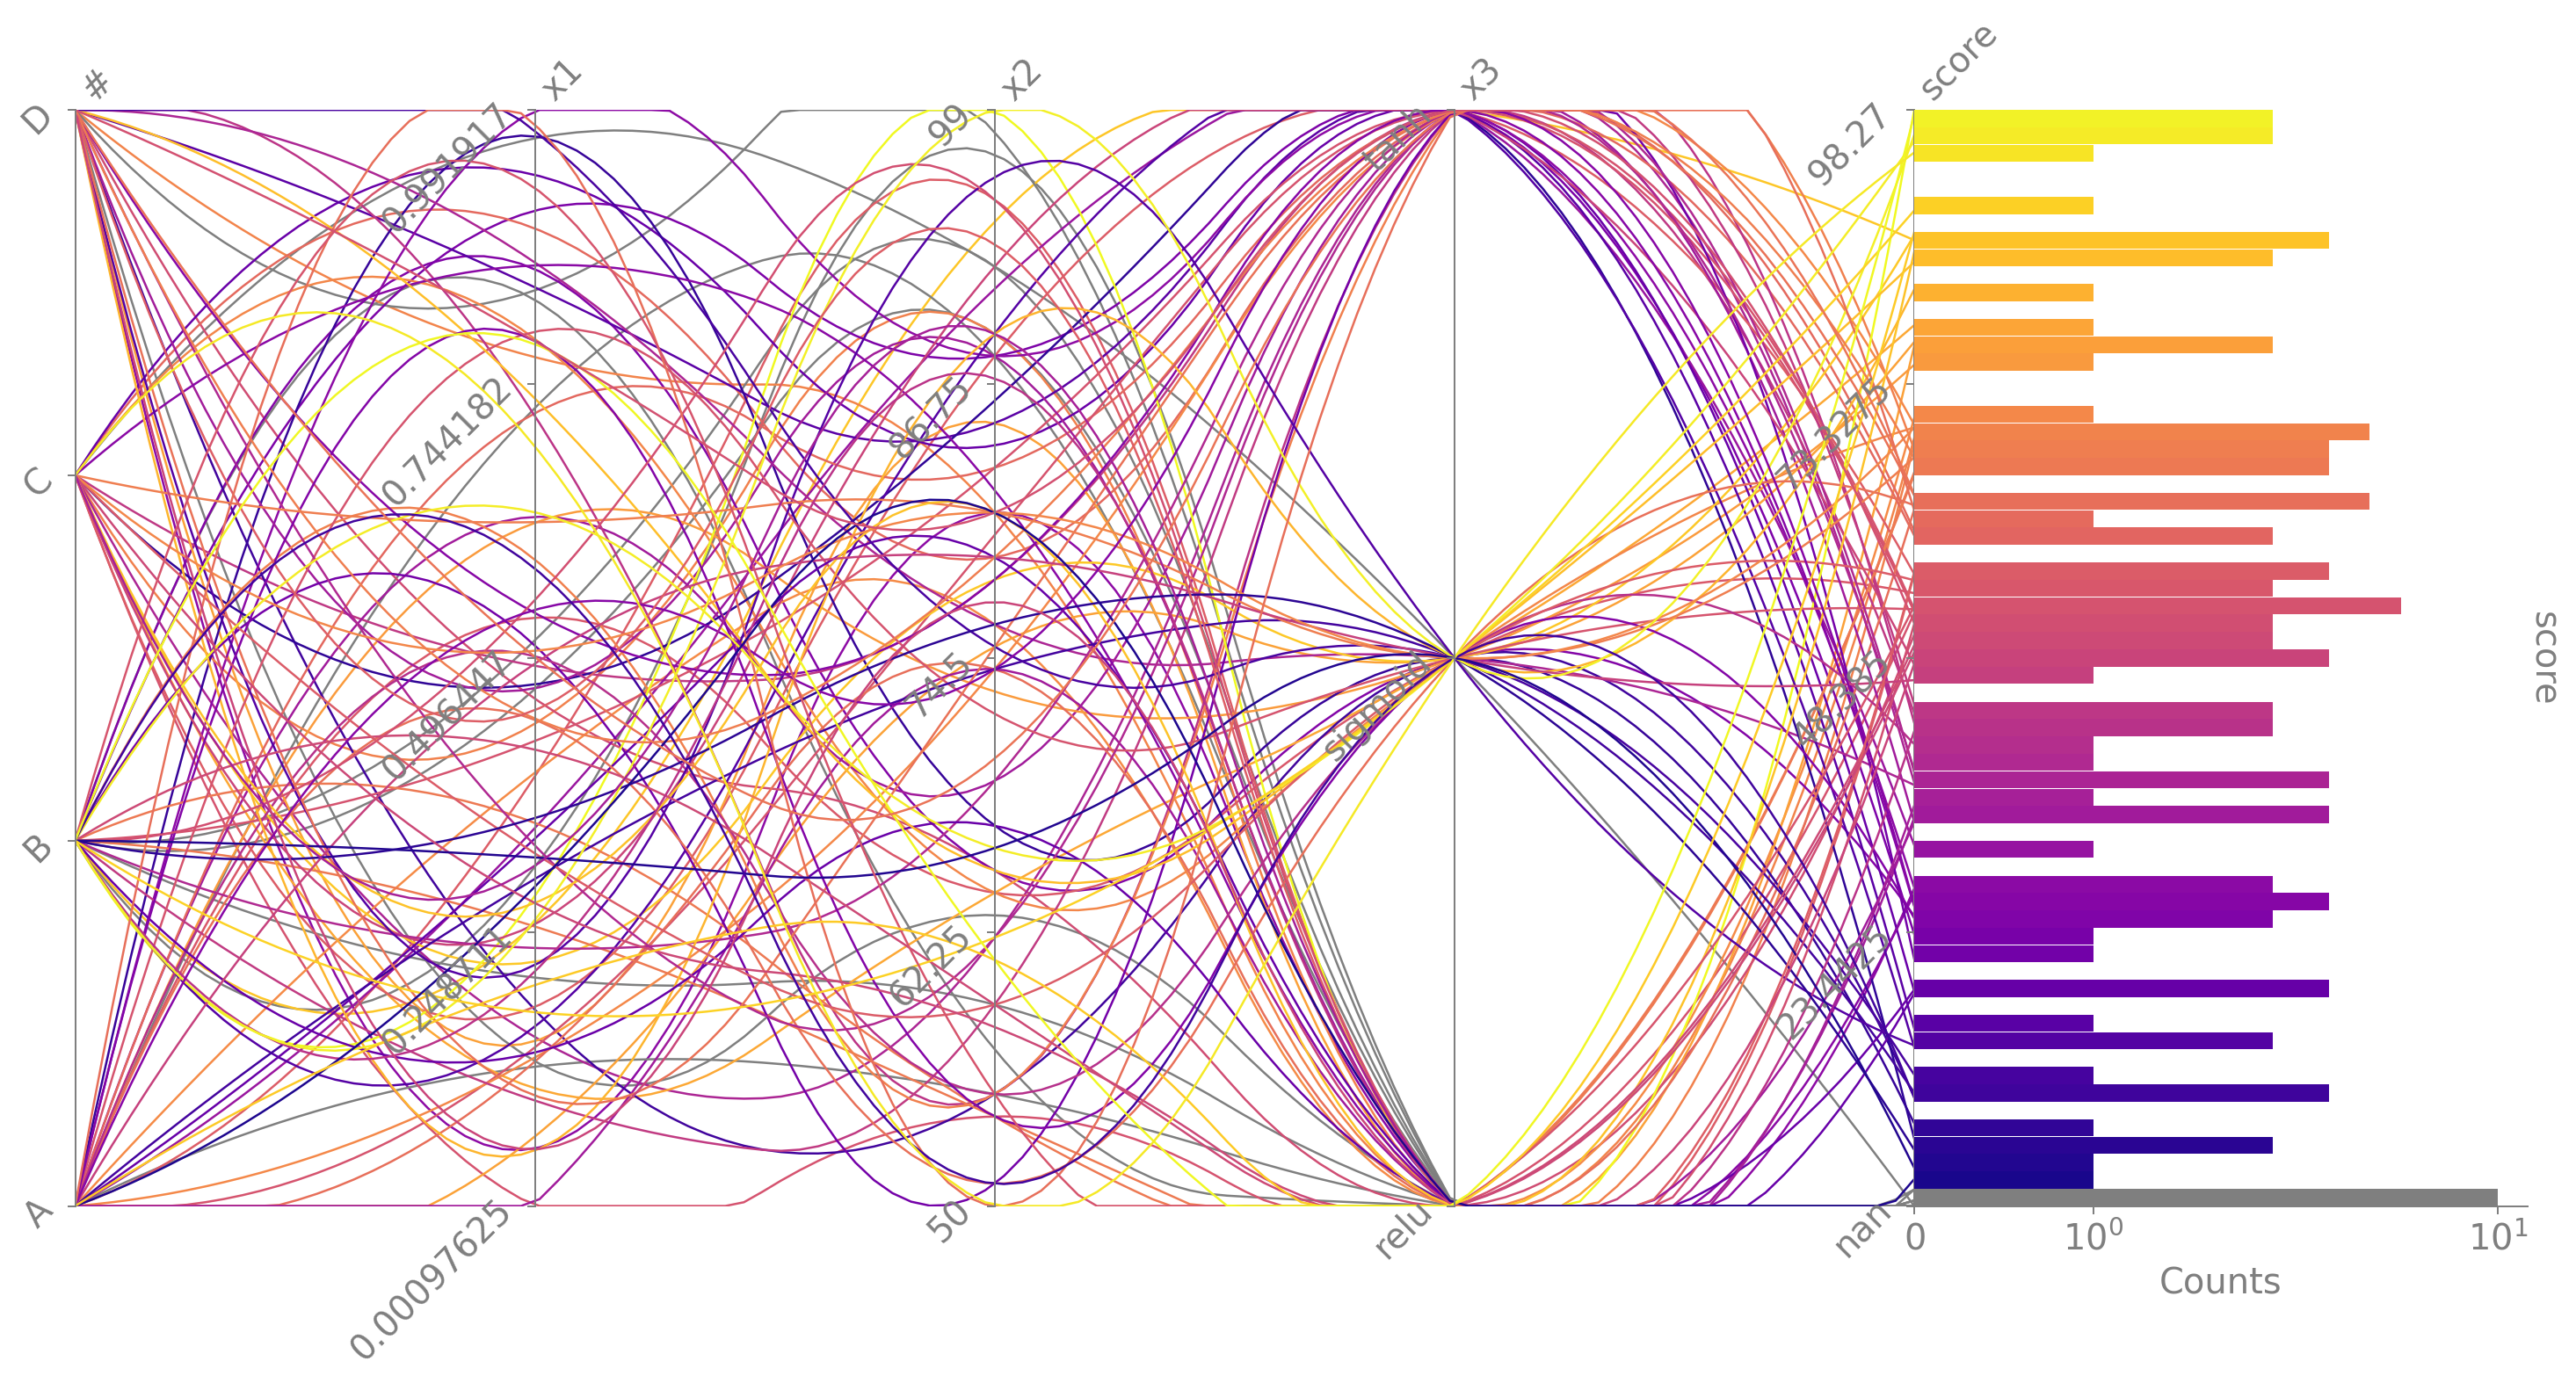

In [55]:
importlib.reload(alvp)


PC = alvp.ParallelCoordinates(
    show_idcol=True,
    interpkind='quadratic',
    res=100,
    axpos_coord=None, axpos_hist=None,
    map_suffix='__map__',
    ticks2display=5, tickcolor='tab:grey', ticklabelrotation=45, tickformat='%g',
    nancolor='tab:grey', nanfrac=4/256,
    linealpha=1, linewidth=1,
    base_cmap='plasma', cbar_over_hist=False,
    n_jobs=6, n_jobs_addaxes=1, sleep=0.0,
    verbose=1,
    text_kwargs=None,    
)
# print(PC)
fig, axs = PC.plot(
    coordinates=df,
    id_col='#',
    score_col='score',
    coords_cols=r'^.*$',
    min_score=None, max_score=None, remove_nanscore=True,
    # score_scaling='np.log10(pl.col(score_col))',
    score_scaling='pl.col(score_col)',
    show_idcol=None,
    interpkind=None,
    res=None,
    axpos_coord=None, axpos_hist=None,
    ticks2display=None, tickcolor=None, ticklabelrotation=None, tickformat=None,
    nancolor=None, nanfrac=None,
    linealpha=None, linewidth=None,
    base_cmap=None, cbar_over_hist=None,
    n_jobs=None, n_jobs_addaxes=None, sleep=None,
    map_suffix=None,
    save=False,
    max_nretries=4,
    verbose=None,
    text_kwargs=None, fig_kwargs={'figsize':(30,9)}, save_kwargs=None,
)

plt.show()

Also works with np.ndarrays, if they are not of dtype object

INFO(ParallelCoordinates): Removed
    0 row(s) via (-inf < <score_placeholder> < inf),
    0 row(s) containig nans,
    0 row(s) total.



[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


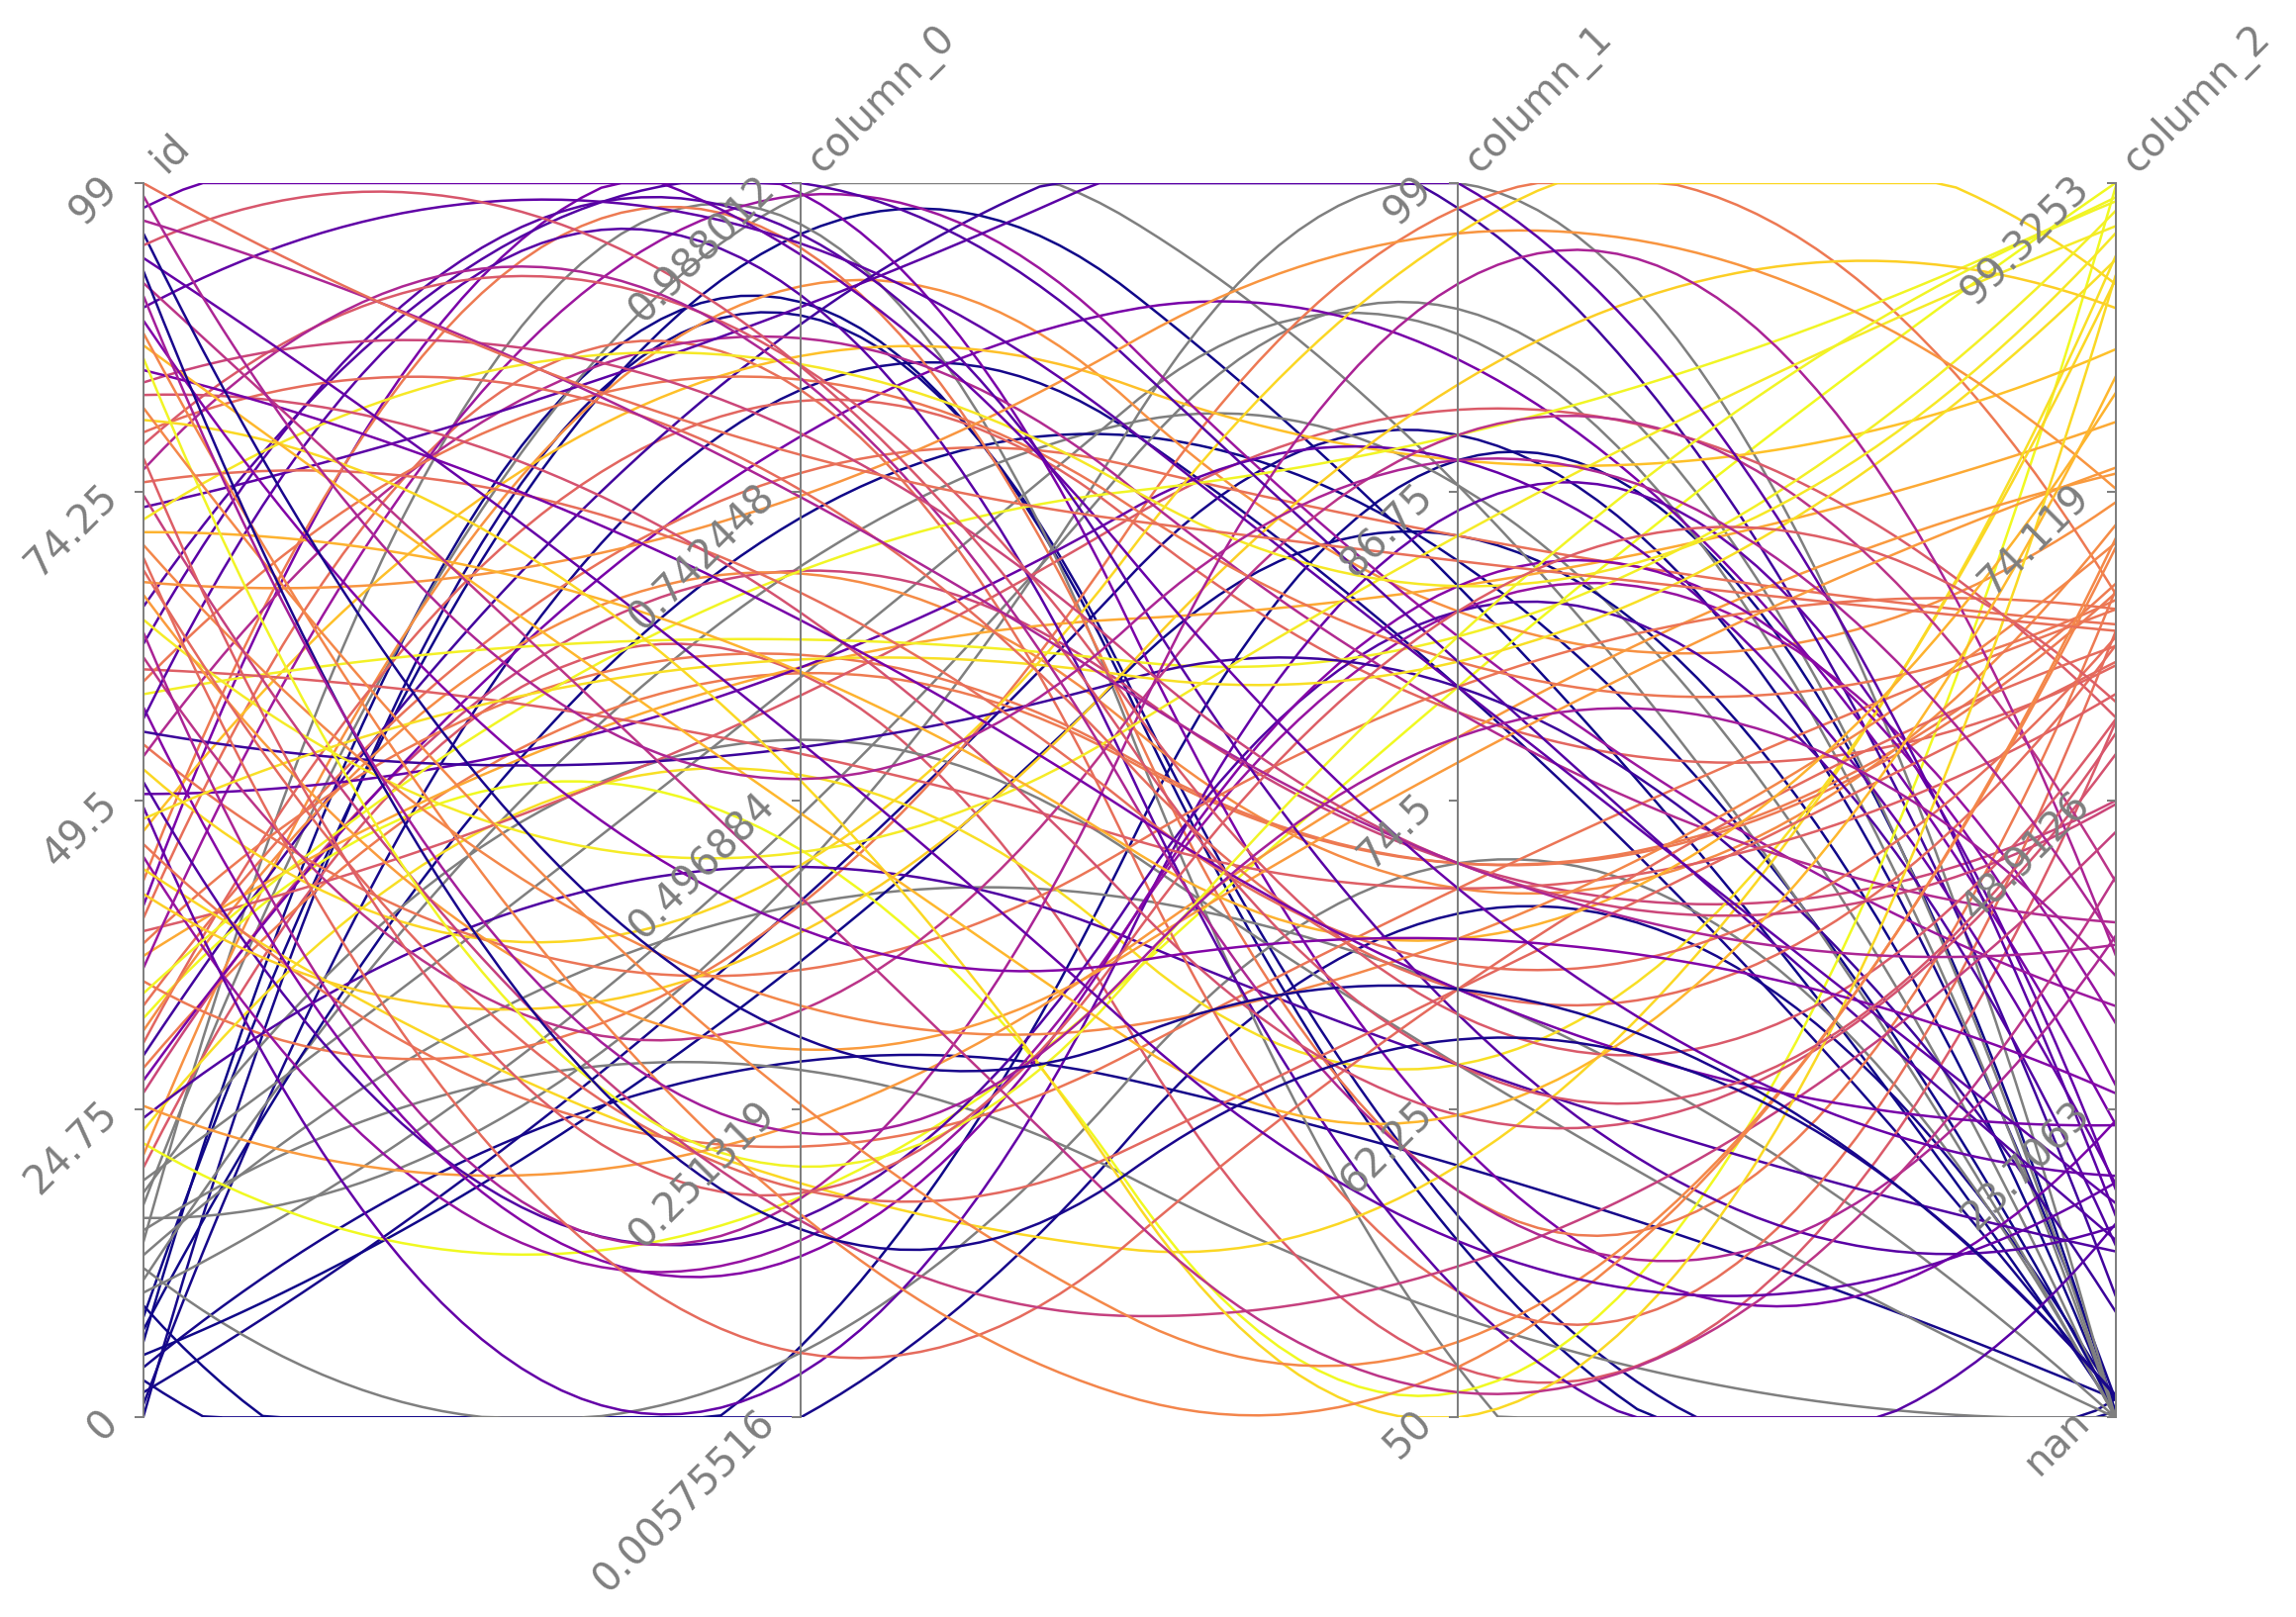

In [97]:
fig, axs = PC.plot(
    coordinates=df_np,
    # coordinates=df,
    id_col=None,
    # id_col='#',
    # score_col='score',
    # score_col=None,
    coords_cols=r'^.*$',
    min_score=None, max_score=None, remove_nanscore=True,
    score_scaling='np.log10(pl.col(score_col))',
    show_idcol=None,
    interpkind=None,
    res=None,
    axpos_coord=None, axpos_hist=None,
    ticks2display=None, tickcolor=None, ticklabelrotation=None, tickformat=None,
    nancolor=None, nanfrac=None,
    linealpha=None, linewidth=None,
    base_cmap=None, cbar_over_hist=None,
    n_jobs=None, n_jobs_addaxes=None, sleep=None,
    map_suffix=None,
    save=False,
    max_nretries=4,
    verbose=None,
    text_kwargs=None, fig_kwargs={'figsize':(30,9)}, save_kwargs=None,
)

plt.show()

# LatentSpaceExplorer

Generate a dummy dataset

In [4]:
class UnravelLatentspace:
    """
        - Generator Class to create polynomials
    """
    def __init__(self) -> None:
        pass

    def predict(self, X_latent:np.ndarray, y=None):

        x = np.linspace(0,1,100)
        X  = np.array([np.polyval(xl, x) for xl in X_latent])

        return X

X_latent, y = make_blobs(n_samples=100, n_features=4, centers=4)


Look at latent dimensions and generated samples (varying 2 latent variables)

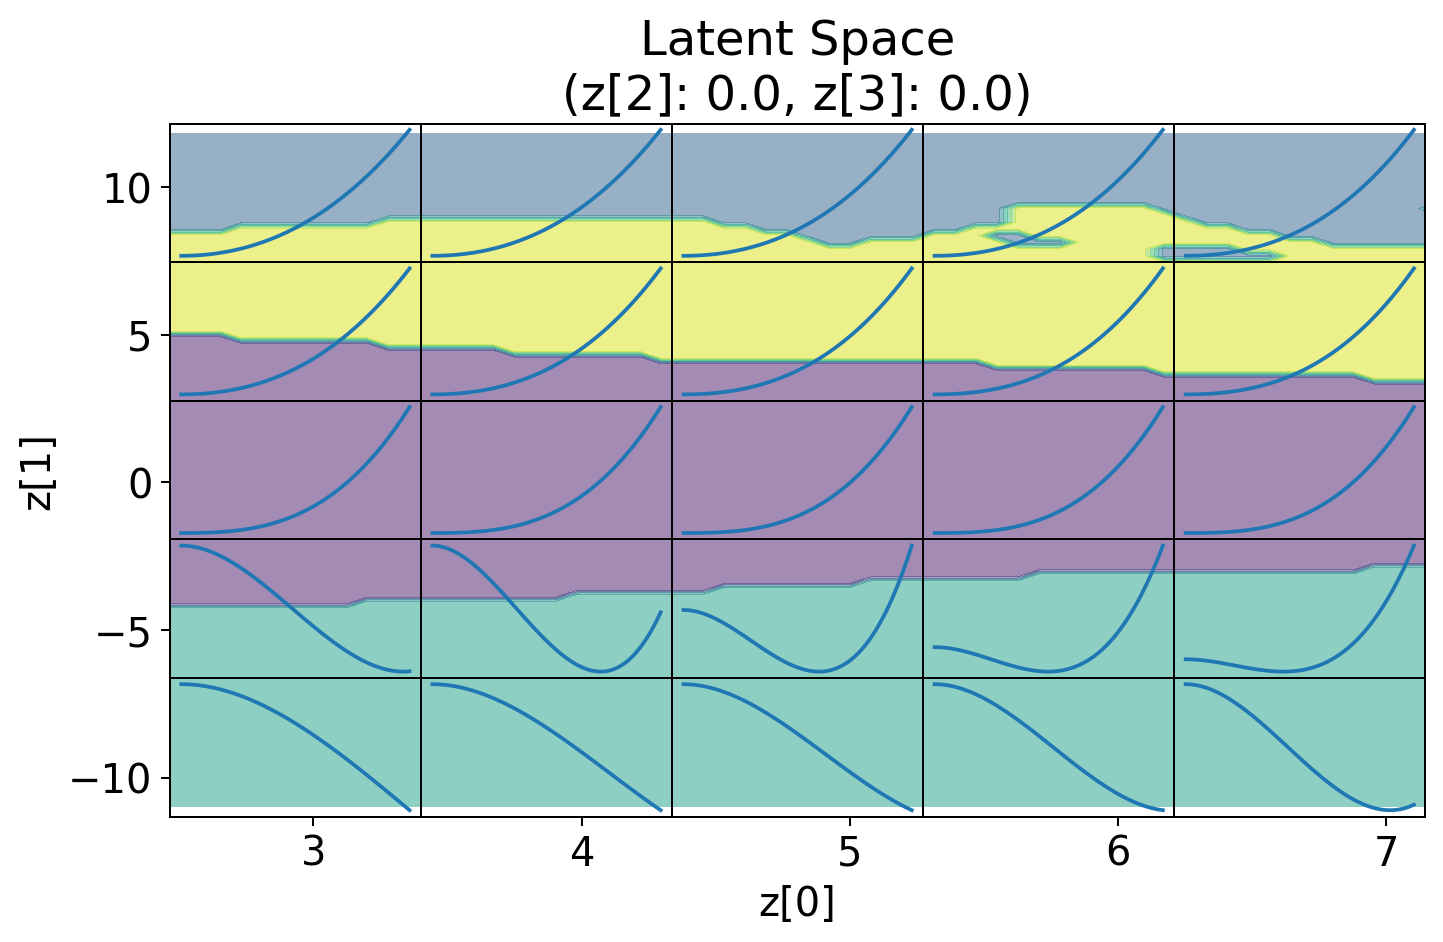

In [18]:
importlib.reload(alvp)

LSE = alvp.LatentSpaceExplorer(
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=1
)

z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
z1 = np.linspace(X_latent[:,1].min()+2,X_latent[:,1].max()-2,5)
fig, axs = LSE.generated_2d(
    generator=UnravelLatentspace(),
    z0=z0, z1=z1,
    zi_f=X_latent.shape[1]-2,
    z0_idx=0, z1_idx=1,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

LSE.plot_dbe(
    X_latent[:,:2], y,
    res=100, k=1,
    ax=axs[-1],
    contourf_kwargs=None,
)

plt.show()

Look at latent dimensions and generated samples (varying 1 latent variable)

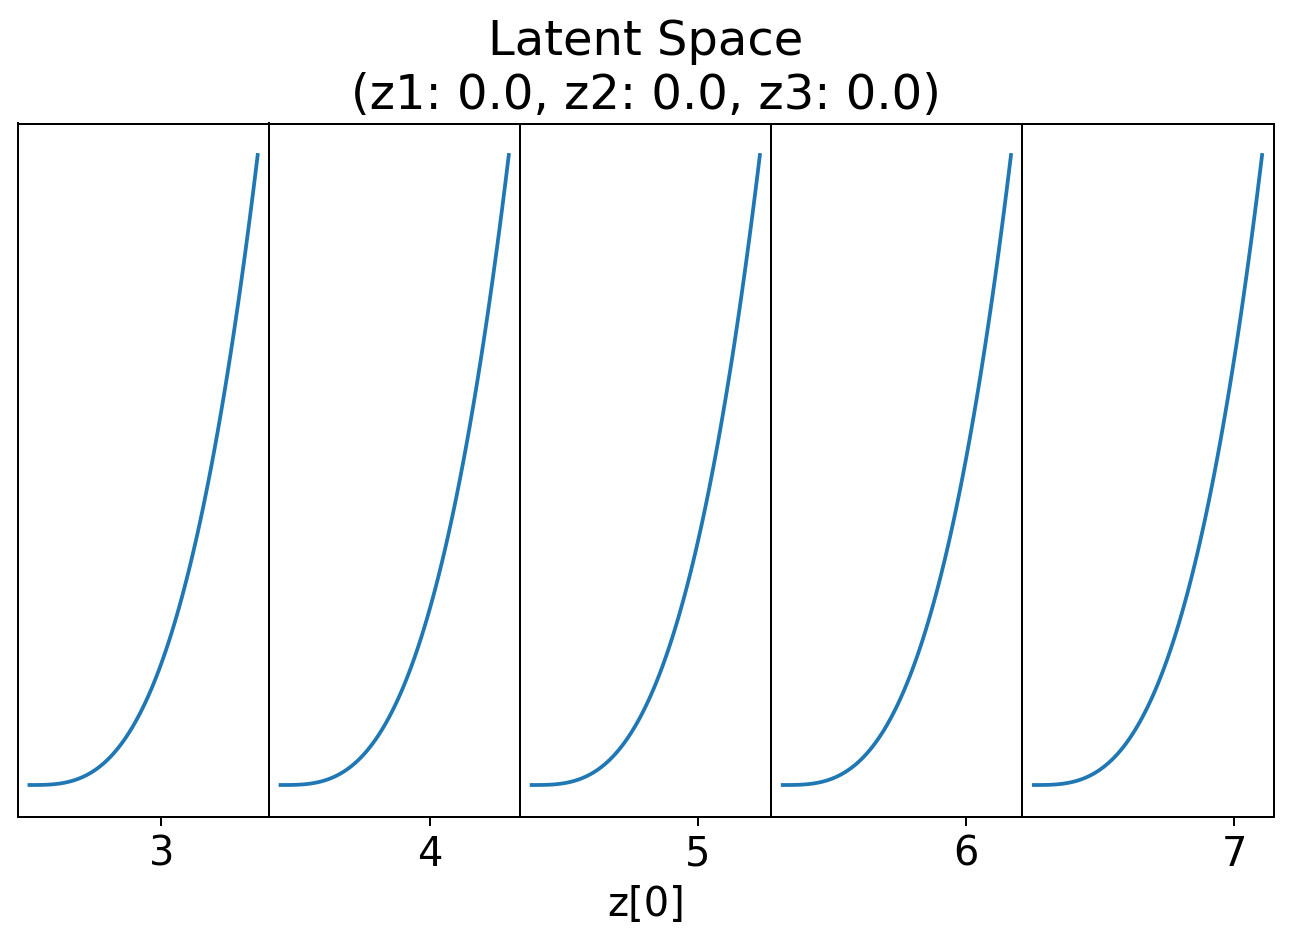

In [19]:
z0 = np.linspace(X_latent[:,0].min()+2,X_latent[:,0].max()-2,5)
fig, axs = LSE.generated_1d(
    generator=UnravelLatentspace(),
    z0=z0,
    zi_f=X_latent.shape[1]-1,
    z0_idx=0,
    plot_func='plot',
    subplots_kwargs=None, predict_kwargs=None, plot_func_kwargs=None,
    verbose=None
)

# Corner Plot

Look at pairwise scatter

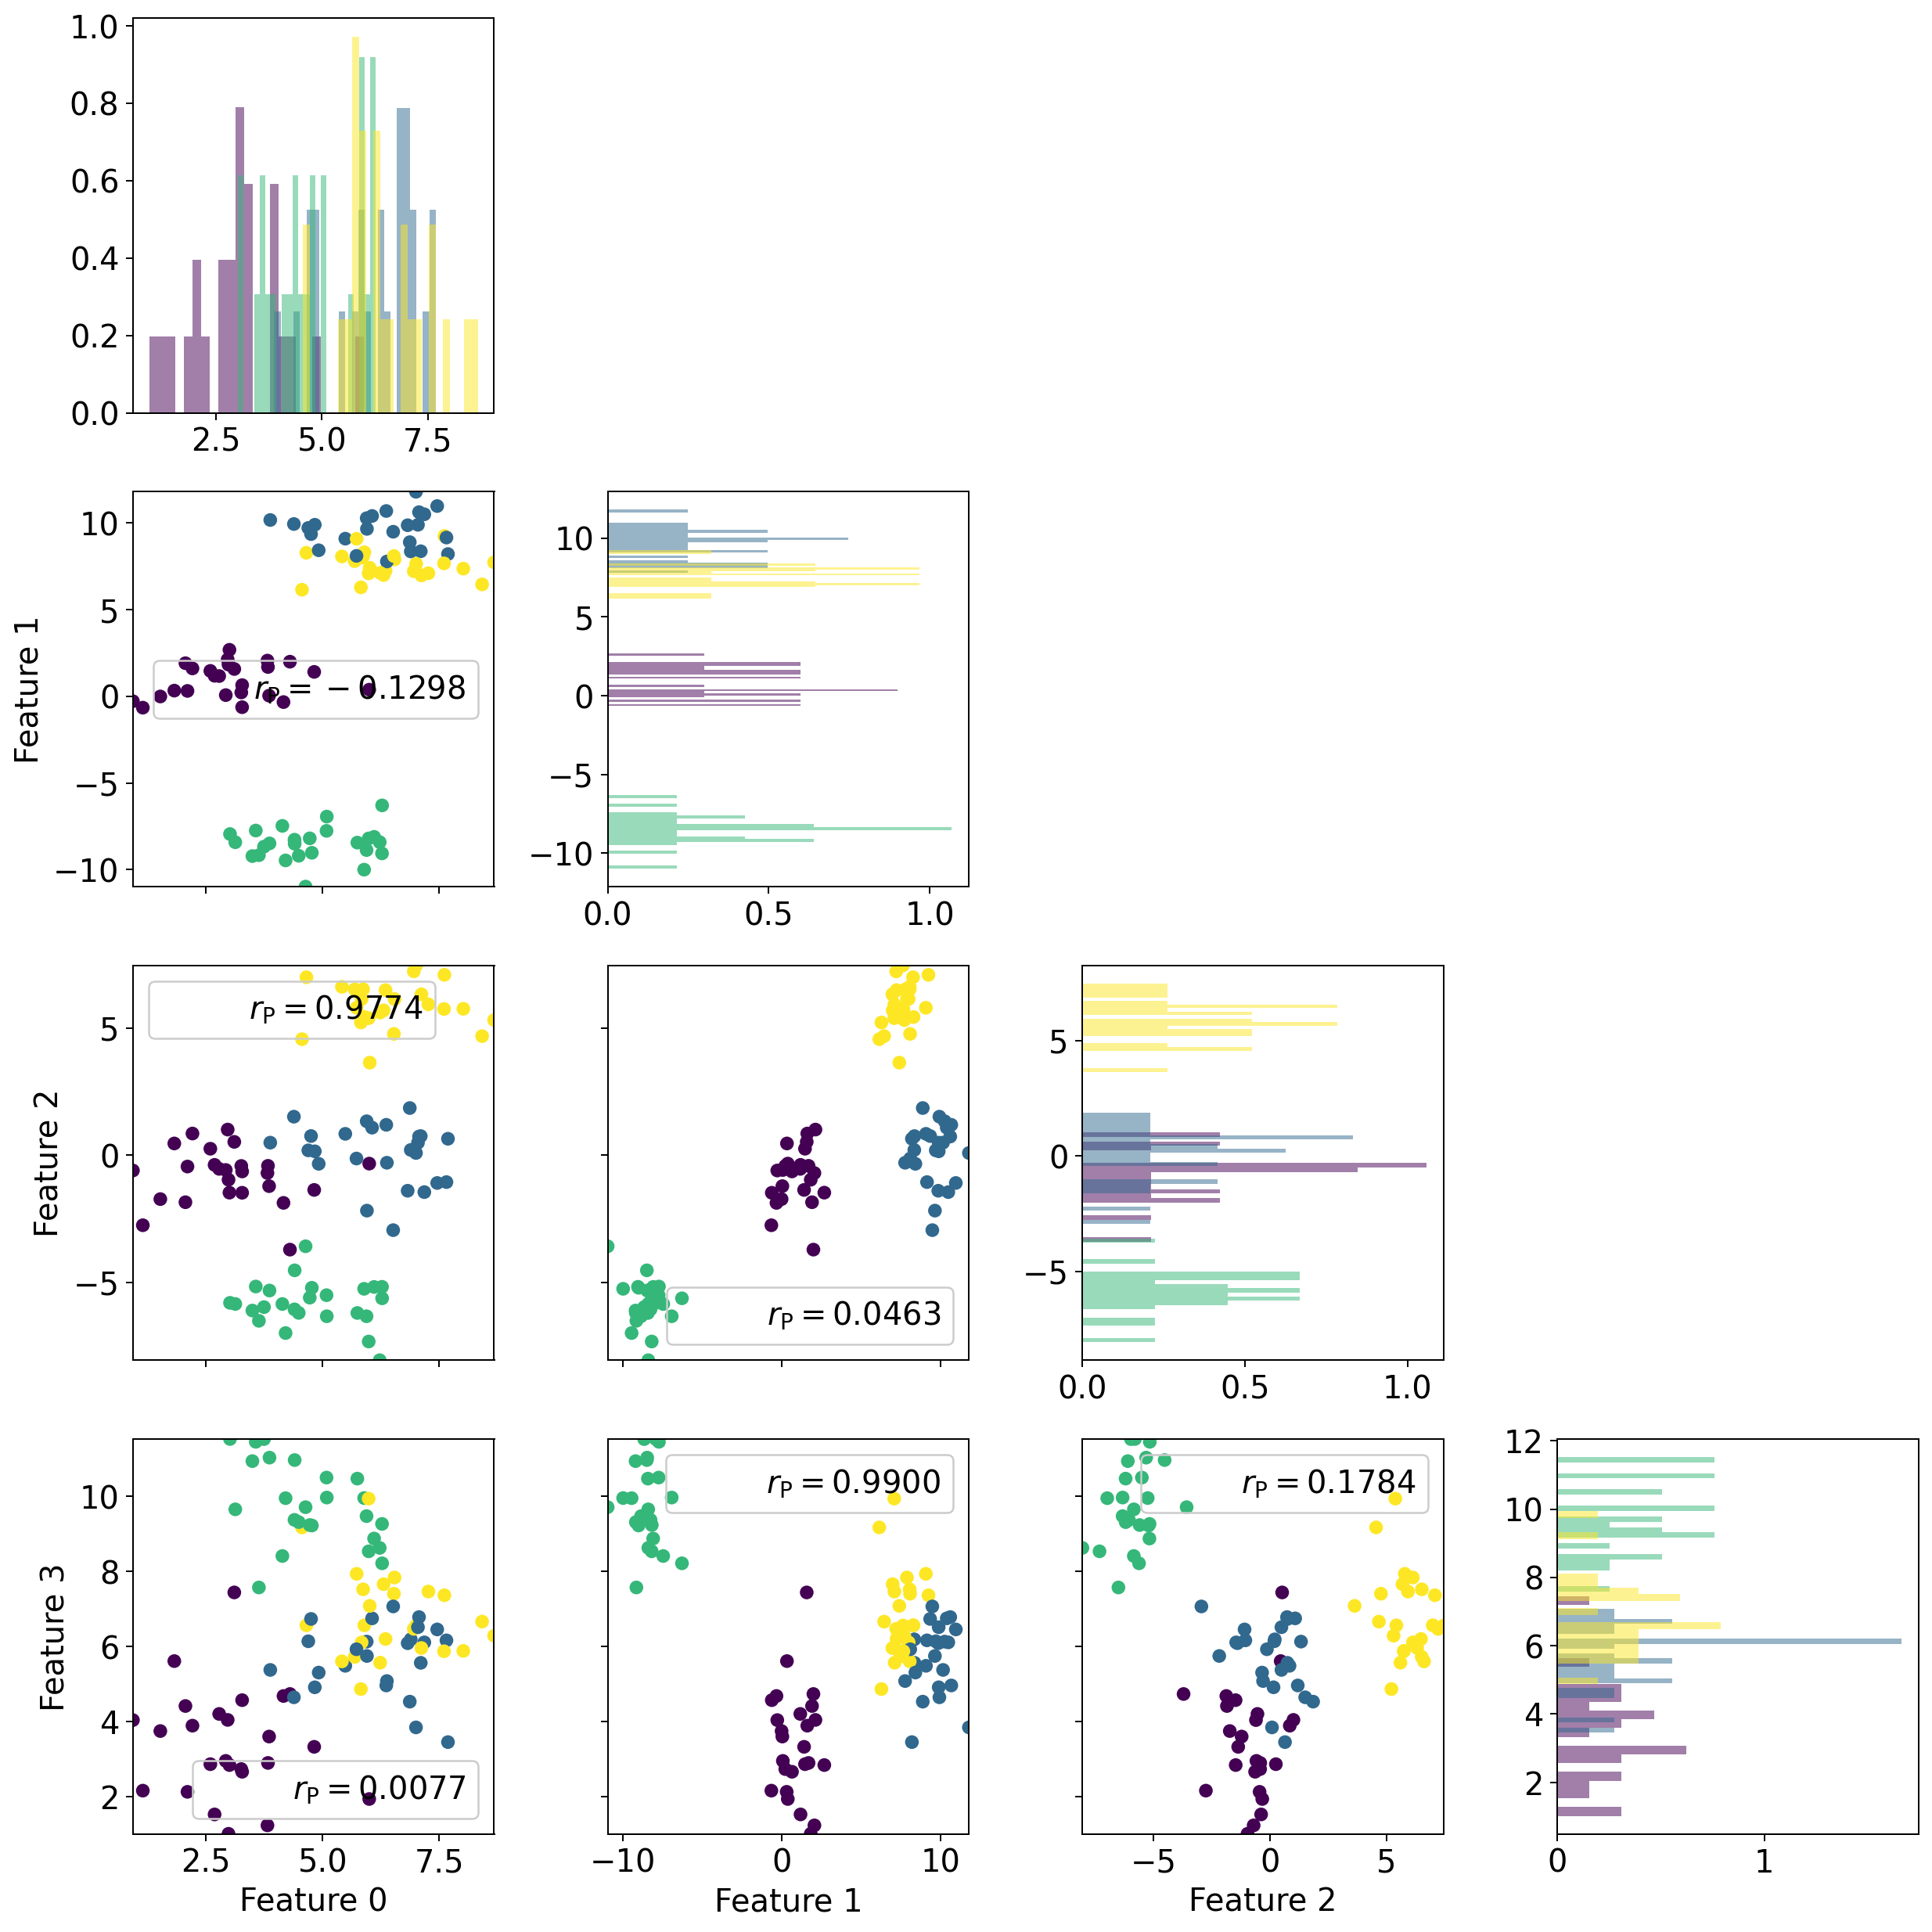

In [23]:
importlib.reload(alvp)

CP = alvp.CornerPlot()

fig = plt.figure(figsize=(14,14))
fig, axs = CP.plot(
    X_latent, y, featurenames=None,
    mus=None, sigmas=None, corrmat=None,
    bins=100,
    cmap='viridis',
    equal_range=False, asstandardnormal=False,
    fig=fig,
    sctr_kwargs={'alpha':1},
    hist_kwargs=None,    
)